<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/read_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Esempio di accesso allo storage SWIFT Cygno**

1.  installa le librerie essenziali
2.  accede al google drive (attenzione segure la procedura di autenticazione)
3.  carica la libreria di cygno

esegui solo all'inizio



In [0]:
##################
import numpy as np
import sys
################# root to path
from os.path import join
from google.colab import drive
!pip install -q  python-swiftclient
!pip install -q  keystoneauth1
!pip install -q  h5py

import gspread
from oauth2client.client import GoogleCredentials


ROOT = "/content/drive"
drive.mount(ROOT, force_remount=True)
PROJ = "My Drive/Colab Notebooks" # This is a custom path.

PROJECT_PATH = join(ROOT, PROJ)

from importlib.machinery import SourceFileLoader
cygnus_lib = SourceFileLoader('cygnus_lib', join(PROJECT_PATH, 'cygnus_lib.py')).load_module()

import cygnus_lib as cy

import matplotlib.pyplot as plt
%matplotlib inline


    100% |████████████████████████████████| 92kB 3.3MB/s 
    100% |████████████████████████████████| 307kB 7.5MB/s 
    100% |████████████████████████████████| 51kB 19.7MB/s 
Mounted at /content/drive


**Esempio acceso al run 103 immagine 0**

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


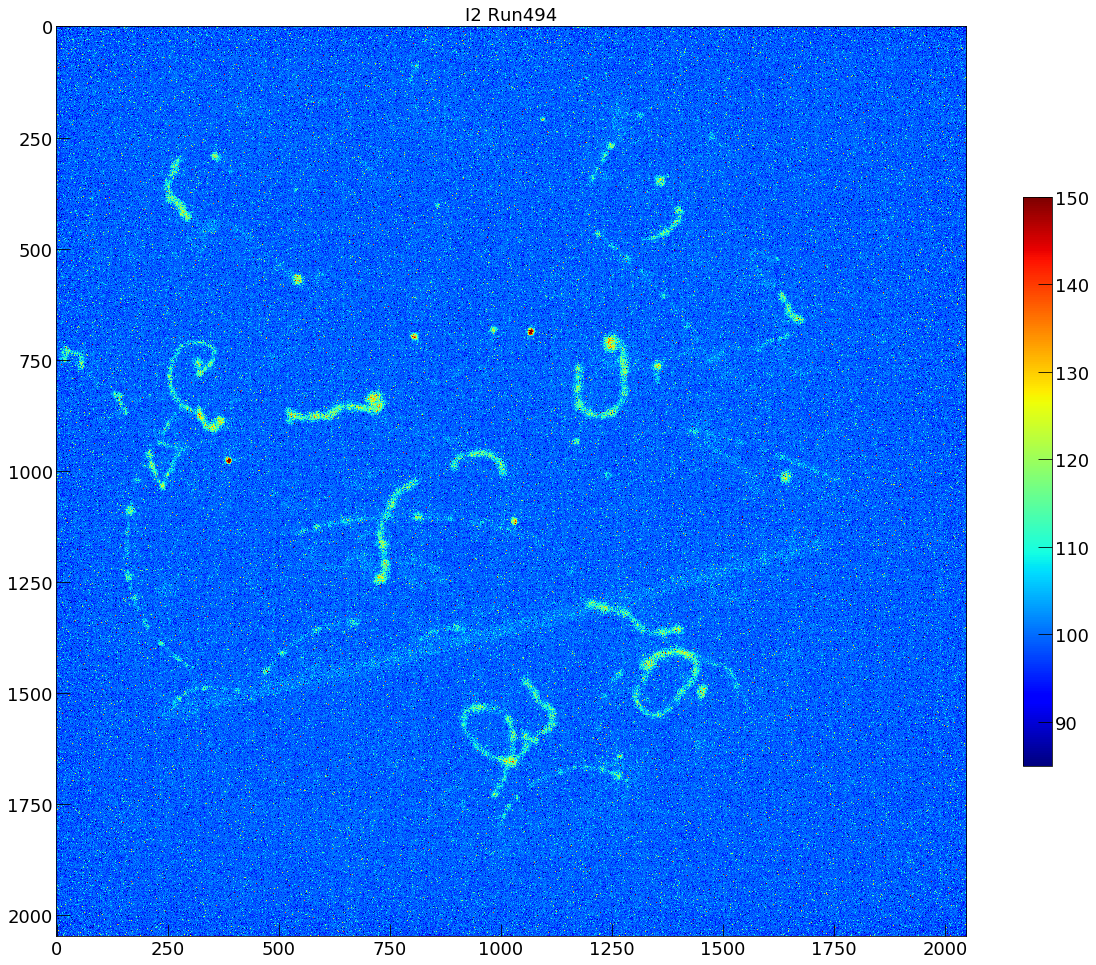

In [0]:
cy.set_atlas_style('large')
dataSelection = 'LAB'
run = 494
traccia = 2
try:
    image = cy.swift_read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, run, traccia))
except:
    print ("FILE ERROR: %s" % (cy.imageFile2FullPathCygnus(dataSelection, run, traccia)))
try:
  plt.title("I%d Run%d" % (traccia, run))
  plt.imshow(image, cmap="jet", vmin=85,vmax=150)
  plt.colorbar(shrink=0.5)
  plt.show()
except:
    print ("POLT ERROR")

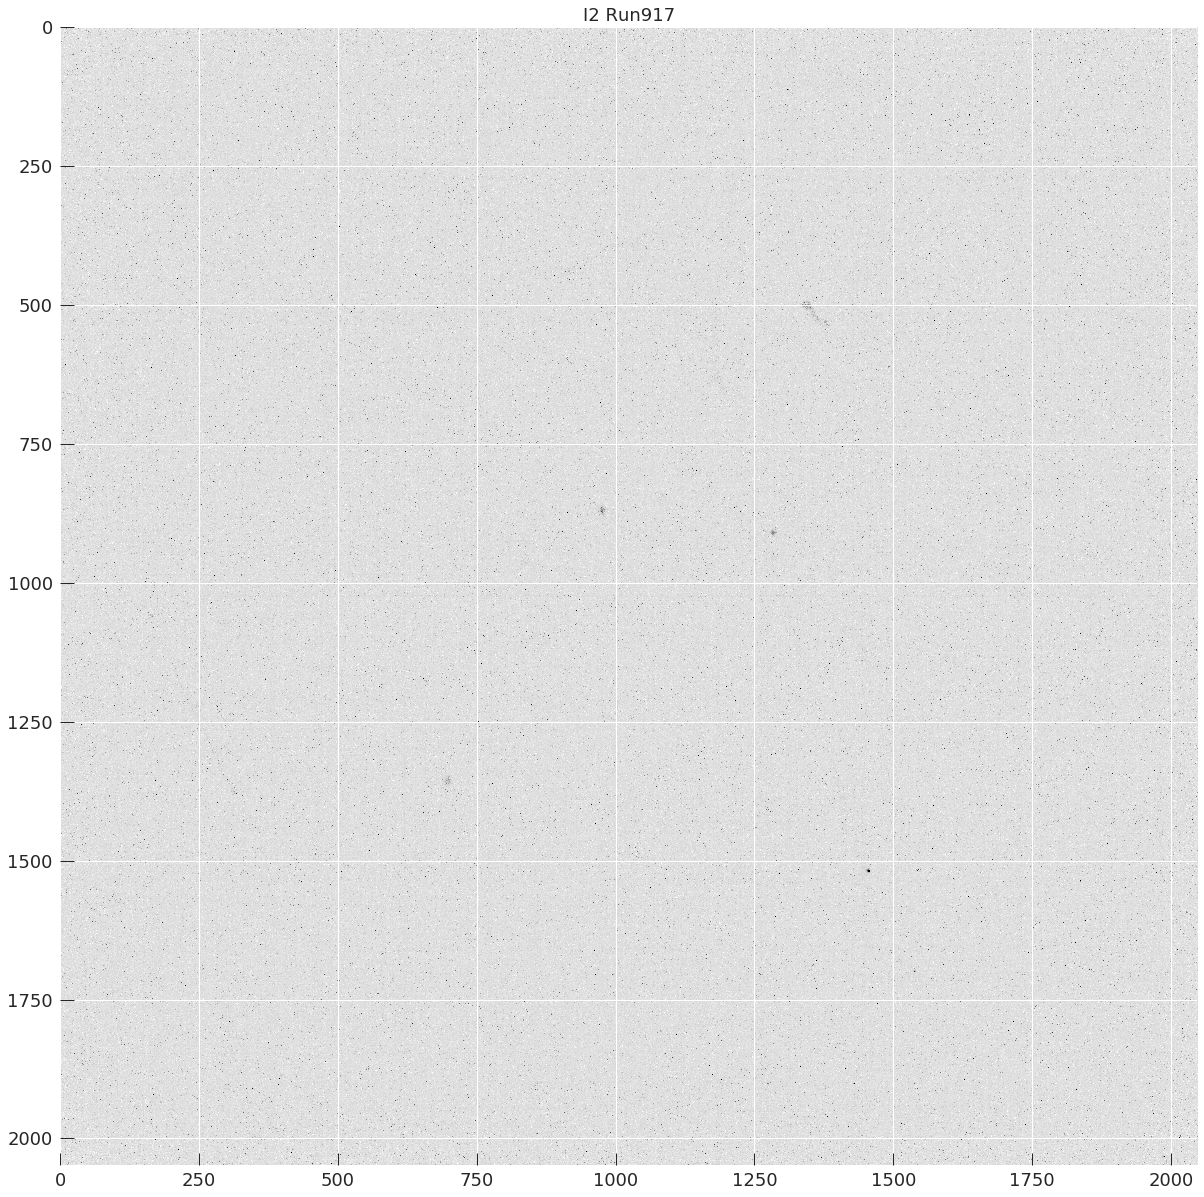

415741843


In [0]:
plt.title("I%d Run%d" % (traccia, run))
plt.imshow(image, vmin=85,vmax=150)
plt.show()
print (np.sum(image))

esempio di list delle imagini di un determinato run

In [0]:
dataSelection = "LTD"
runI = 917
files = cy.swift_listdir(cy.file2FullPathCygnus(dataSelection, runI, 'H5'))
print ("numero di file nel run %d " % np.size(files))
files

numero di file nel run 200 


['Data/LTD/Data_Camera/H5/Run917/run917-0000.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0001.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0002.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0003.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0004.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0005.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0006.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0007.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0008.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0009.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0010.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0011.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0012.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0013.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0014.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0015.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0016.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0017.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0018.h5',
 'Data/LTD/Data_Camera/H5/Run917/run917-0019.h5',


**Legge il logbook di CYGNO**

In [0]:

from google.colab import auth
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())
# Open CYGNO Logbook.

worksheet = gc.open('CYGNO-DataLogbook').sheet1
# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
#print(rows)

# Convert to a DataFrame and render.
import pandas as pd
pd.DataFrame.from_records(rows)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,File name,saved events,CMOS Exposure Time (ms),comments,Nominal Flux He/CF4,He:CF4,Transfer field strength (kV/cm),GEM 3 (V),GEM 2 (V),GEM 1 (V),...,Requested Drift field V/cm,Calculated Field Cage Anode (V),Calculated Field Cage Catode (V),Calculated Drift field V/cm,PMT Supply (V),PMT Supply UP (V),PMT Supply DOWN (V),Currents \nmonitor RUN (name of file),atmospheric pressure (hPa),ambient temperature (C)
1,3 ottobre 2018 Orca Flash black - no lens,,,,,,,,,,...,,,,,,,,,,
2,817,100,10,camera only (blaked/no lens),0,60/40,0,0,0,0,...,0,0,0,0,0,0,0,,,
3,818,100,100,camera only (blaked/no lens),0,60/40,0,0,0,0,...,0,0,0,0,0,0,0,,,
4,819,100,1000,camera only (blaked/no lens),0,60/40,0,0,0,0,...,0,0,0,0,0,0,0,,,
5,820,100,10000,camera only (blaked/no lens),0,60/40,0,0,0,0,...,0,0,0,0,0,0,0,,,
6,4 ottobre 2018 -- LEMON --- Orca Flash - Fe lo...,,,,,,,,,,...,,,,,,,,,,
7,821,10,150,tranfer field nominale 2,,60/40,2,440,440,440,...,600,2960,14960,600,,,,,,
8,822,10,150,"tranfer field 1,6/2,5 invertiti.",,60/40,2,440,440,440,...,600,2960,14960,600,,,,,,
9,823,100,100,scan in HV drift; campi nominali,,60/40,2,450,450,450,...,600,2990,14990,600,,,,,,
